In [282]:
import numpy as np
import matplotlib.pyplot as plt

98


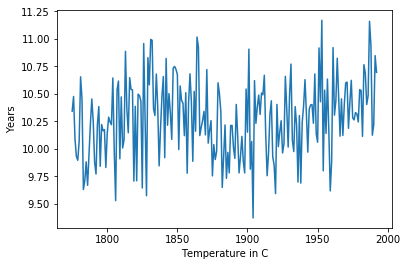

In [648]:
# Create the dataset
dataset = []
N = 218
jumpindex = (int)(216*np.random.rand()+1)
print(jumpindex)
orig_gamma= 3
# average temperature in Prague is 18 C
# before jump
orig_alpha1 = 10
orig_beta1 = np.sign(-1+2*np.random.rand())*0.005
# after jump
orig_alpha2 = 10
orig_beta2 = np.sign(-1+2*np.random.rand())*0.005
for i in range(0,jumpindex):
    dataset.append(np.random.normal(orig_alpha1 + orig_beta1*i, 1/orig_gamma))
for i in range(jumpindex,N):
    dataset.append(np.random.normal(orig_alpha2 + orig_beta2*(i-jumpindex), 1/orig_gamma))
plt.plot(np.arange(1775,1993,1),dataset)
plt.xlabel('Temperature in C')
plt.ylabel('Years')

plt.show()


In [649]:
def calculateB(xn,rp):
    # xn = [alpha1, beta1, alpha2, beta2, gamma, rn]
    # rn = index of current changepoint
    # rp = index of candidate changepoint
    result=0
    if(rp>xn[5]):
        for i in range(xn[5],rp):
            result += (dataset[i]-xn[2]-xn[3]*(i-xn[5]))**2 - (dataset[i]-xn[0]-xn[1]*i)**2
    else:
        for i in range(rp,xn[5]):
            result += - (dataset[i]-xn[2]-xn[3]*(i-xn[5]))**2 + (dataset[i]-xn[0]-xn[1]*i)**2
    return np.exp((xn[4]/2)*result)

In [650]:
# Under the null hypothesis of no change

# Prior parameters for alpha
ν1 =9.5
ν2 = 10
ξ1 =ξ2 =1

# Prior parameters for beta
η1 =η2 =0
ζ1 =ζ2 =0.1

# Initial values for alpha, beta and gamma
alpha1= alpha2 = 10
beta1= beta2= 0.1
gamma = np.random.gamma(1,1)

In [651]:
# METHODS TO DRAW ALPHA, BETA AND GAMMA FROM CONDITIONAL DISTRIBUTIONS

def M1a(r,beta1):
    res=0
    for i in range(0,r):
        res+=dataset[i] - beta1*i
    return res

def M2a(r,beta2):
    res=0
    for i in range(r,N):
        res+=dataset[i] - beta2*(i-r)
    return res

def M1b(r,alpha1):
    res=0
    for i in range(0,r):
        res+= i*(dataset[i]-alpha1)
    return res

def M2b(r,alpha2):
    res=0
    for i in range(r,N):
        res+= (i-r)*(dataset[i]-alpha2)
    return res

def G(r):
    return (r*(r+1)*(2*r+1))/6

# f_ α1,α2 | β1,β2,γ,r,z
def getAlpha(beta1,beta2,gamma,r):
    mu = []
    mu.append((ν1+gamma*(ξ1**2)*M1a(r,beta1))/(1+gamma*(ξ1**2)*r))
    mu.append((ν2+gamma*(ξ2**2)*M2a(r,beta2))/(1+gamma*(ξ2**2)*(N-r)))
    cov = [[((ξ1**2)/(1+gamma*(ξ1**2)*r)),0], [0,((ξ2**2)/(1+gamma*(ξ2**2)*(N-r)))]]
    return np.random.multivariate_normal(mu,cov)

# f_ β1,β2 |α1,α2,γ,r,z 
def getBeta(alpha1,alpha2,gamma,r):
    mu = []
    mu.append((η1+gamma*(ζ1**2)*M1b(r,alpha1))/(1+gamma*(ζ1**2)*G(r)))
    mu.append((η2+gamma*(ζ2**2)*M2b(r,alpha2))/(1+gamma*(ζ2**2)*G(N-r)))
    cov = [[((ζ1**2)/(1+gamma*(ζ1**2)*G(r))),0], [0,((ζ2**2)/(1+gamma*(ζ2**2)*G(N-r)))]]
    return np.random.multivariate_normal(mu,cov)

# f_ γ|α1,α2,β1,β2,r,z
def getGamma(alpha1,alpha2,beta1,beta2,r):
    res=1
    for i in range(0,r):
        res += (1/2)*((dataset[i]-alpha1-beta1*i)**2)
    for i in range(r,N):
        res += (1/2)*((dataset[i]-alpha2-beta2*(i-r))**2)
    shapeparam= (N/2)+1
    scaleparam= 1/res
    return np.random.gamma(shapeparam,scaleparam)

#print(getAlpha(beta1,beta2,orig_gamma,130))
#print(getBeta(alpha1,alpha2,orig_gamma,130))
#print(getGamma(alpha1,alpha2,beta1,beta2,130))

    

In [652]:
# MAIN FOR LOOP TO FIND THE CHANGEPOINT
good_enough=40
counter=0
rn = (int)(216*np.random.rand()+1)
while(counter<good_enough):
    rp = (int)(216*np.random.rand()+1)
    if(np.random.rand()<min(1,calculateB([alpha1, beta1, alpha2, beta2, gamma, rn],rp))):
        rn = rp
        counter=0
    else:
        counter+=1
    alpha1,alpha2 = getAlpha(beta1,beta2,gamma,rn)
    beta1,beta2 = getBeta(alpha1,alpha2,gamma,rn)
    gamma= getGamma(alpha1, alpha2,beta1,beta2,rn)
    print(rn, alpha1, alpha2, beta1, beta2, gamma)    



212 0.0749063182281 10.2445894891 0.0708739999727 -0.0127743527669 0.03902264623477925
132 6.45096440313 9.85144094954 0.0476820793356 0.0115020008665 0.40295522014128765
132 7.36530036413 9.89322203874 0.0313507207553 0.0115278715836 0.7469028554178461
132 8.11848403564 10.0012941728 0.0237157781291 0.0106934750591 1.1893744981337868
132 8.63681087199 9.98887748755 0.0187454925794 0.00588543166523 1.7873240277469726
1 10.5244767698 9.62254178872 -0.00461512085748 0.00506334744792 4.084097842332962
156 10.6277441503 10.1863775186 -0.00351213075609 0.00627252497382 5.804109222767165
156 10.5085908525 10.2191454063 -0.00178681582952 0.00616562508932 6.73978241538018
156 10.3355564513 10.139286538 -0.0010498664342 0.00688875082348 8.191704257359373
156 10.3631428456 10.143837395 -0.00122445986056 0.00745370180271 8.11413665652575
156 10.2835020576 10.1588313291 -0.000496517870509 0.00722714373624 9.235195112032049
156 10.2480316525 10.1582910055 -0.00106493105273 0.00668525248082 7.745904